In [1]:
import plotly
import geopandas as gpd
import pandas as pd
import plotly.graph_objects as go

In [2]:
gdf= gpd.read_file('tornado_loc.shp')

In [24]:
import itertools
import numpy as np
import matplotlib.colors as mcolors
comb= np.array(list(itertools.product(np.arange(1,8), repeat=2)))

In [4]:
source = comb[:,0]
target = comb[:,1]+8
value = [len(gdf[(gdf.LandUse_Be==str(source[i])) & (gdf.LandUse_En==str(target[i]-8))]) for i in range(len(source))]

In [14]:
landuse_mapper = {
1: "Agriculture",
2: "Developed",
3: "Forest",
4: "Non-Forest Wetland",
5: "Other",
6: "Rangeland or Pasture",
7: "Non-Processing Area Mask",
}

lu_colors=['#efff6b', '#ff2ff8', '#1b9d0c', '#97ffff', '#a1a1a1', '#c2b34a', '#1B1716']

In [42]:
np.array(value).reshape(7,7).sum(axis=0)

array([14438,  5020, 14371,   423,  1274,  7463,  1380])

In [43]:
np.array(value).reshape(7,7).sum(axis=1)

array([14652,  5393, 13738,   420,  1367,  7406,  1393])

In [46]:
(np.array(value).reshape(7,7).sum(axis=1) - np.array(value).reshape(7,7).sum(axis=0))/np.array(value).reshape(7,7).sum(axis=0) * 100

array([ 1.48219975,  7.43027888, -4.40470392, -0.70921986,  7.29984301,
       -0.76376792,  0.94202899])

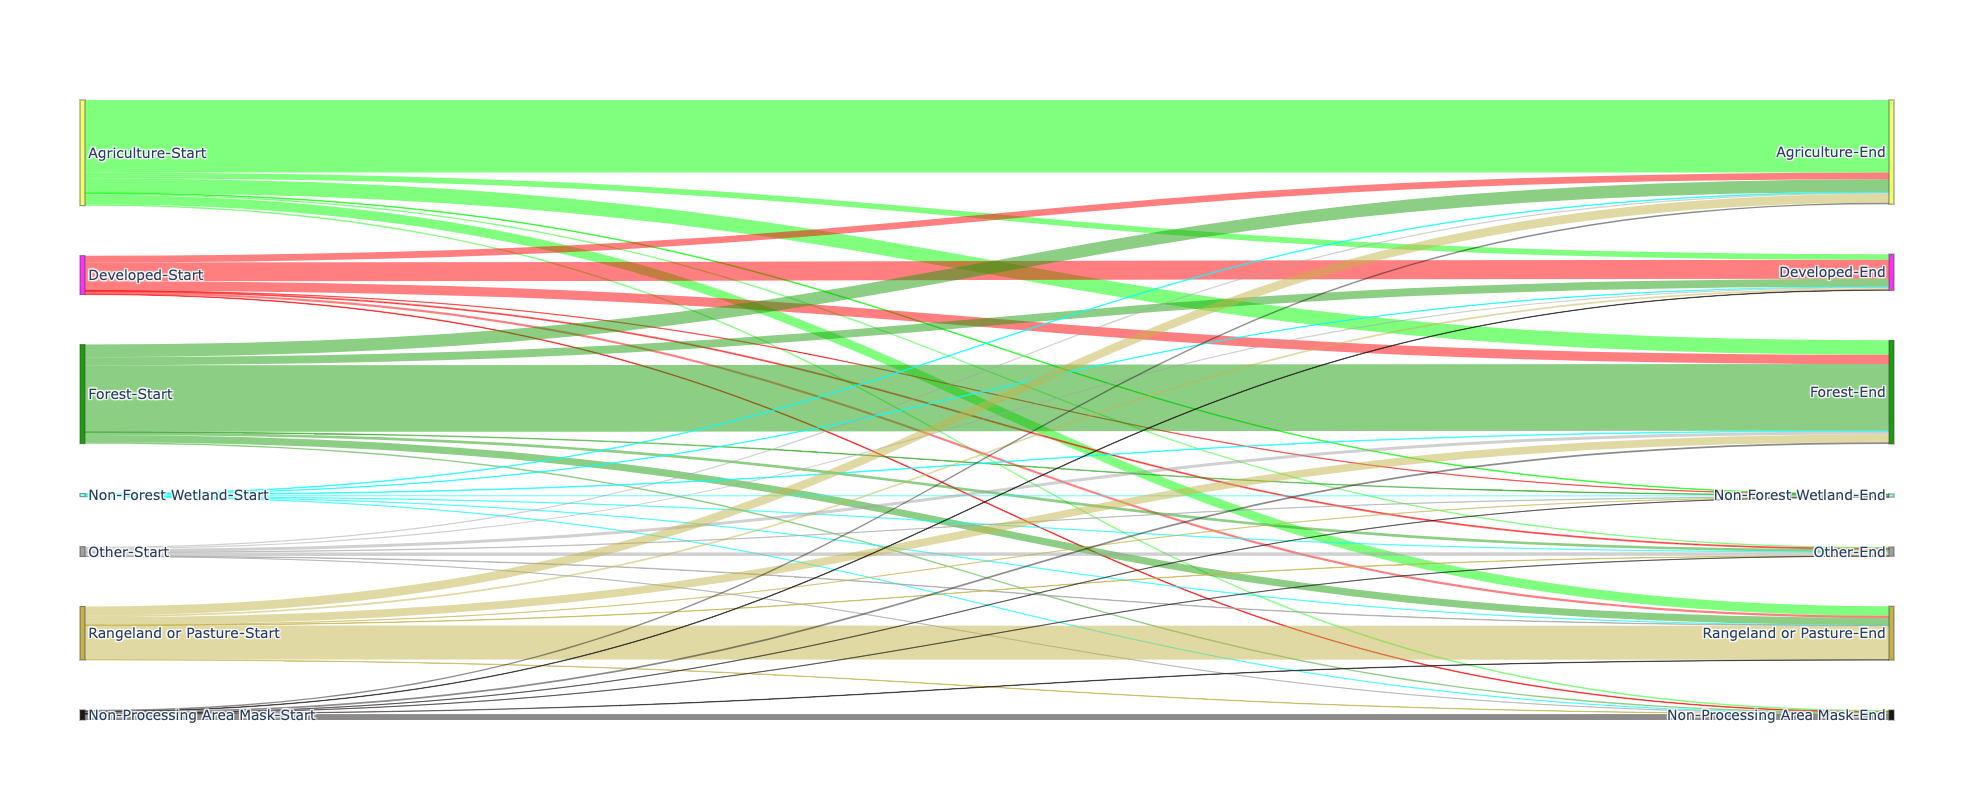

In [38]:
link = dict(source = source-1, target = target-2, value=value, color=['rgba'+str(mcolors.to_rgba(lu_colors[i-1],0.5)) for i in source])
# link= dict(source=[landuse_mapper[source[i]] for i in range(len(source))], target=[landuse_mapper[target[i]-8] for i in range(len(target))],
#           value=value)
label = [landuse_mapper[i]+'-Start' for i in np.unique(source)] + [landuse_mapper[i-8]+'-End' for i in np.unique(target)]
list(landuse_mapper.values())+list(landuse_mapper.values())
node = dict(label = label, pad=50, thickness=5,color=lu_colors+lu_colors)
data = go.Sankey(link = link, node=node)

fig = go.Figure(data,layout={'height':800, 'width':1200, 'font':{'size':14}})

fig.show()

In [39]:
fig.write_image("/Users/hydros/Library/CloudStorage/OneDrive-UniversityofOklahoma/project/tornado/Sankey_plot.pdf", height=800, width=1200)